In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import scale
import sys

sys.path.insert( 0, '../sid')
from get_data import *

sys.path.insert( 0, '../michael')
import rename_cols

In [63]:
# Load Data Set
data_set = get_data()

# Rename Data Frame Columns
cols = ['t_ev',
        't_rev',
        'ebitda',
        'ebitda_margin',
        't_ev/ltm',
        't_ev/ltm_ebitda',
        'est_1yr_rev_gr',
        'est_1yr_ebitda_gr',
        't_rev_1yr_growth',
        'ebitda_1yr_gr',
        't_rev_3_yr_cagr',
        'ebitda_3yr_cagr',
        't_rev_5yr_cagr',
        'ebitda_5yr_cagr',
        'return_on_assets',
        'return_on_equity',
        'capex/rev',
        'ebitda/interest_exp',
        't_debt/cap','t_debt/equity']

feature_cols = cols[1:]

consumer_discrete = pd.DataFrame(data_set[0], columns = cols)
consumer_staples  = pd.DataFrame(data_set[1], columns = cols)
industrials       = pd.DataFrame(data_set[2], columns = cols)

['t_rev', 'ebitda', 'ebitda_margin', 't_ev/ltm', 't_ev/ltm_ebitda', 'est_1yr_rev_gr', 'est_1yr_ebitda_gr', 't_rev_1yr_growth', 'ebitda_1yr_gr', 't_rev_3_yr_cagr', 'ebitda_3yr_cagr', 't_rev_5yr_cagr', 'ebitda_5yr_cagr', 'return_on_assets', 'return_on_equity', 'capex/rev', 'ebitda/interest_exp', 't_debt/cap', 't_debt/equity']
t_rev
ebitda
ebitda_margin
t_ev/ltm
t_ev/ltm_ebitda
est_1yr_rev_gr
est_1yr_ebitda_gr
t_rev_1yr_growth
ebitda_1yr_gr
t_rev_3_yr_cagr
ebitda_3yr_cagr
t_rev_5yr_cagr
ebitda_5yr_cagr
return_on_assets
return_on_equity
capex/rev
ebitda/interest_exp
t_debt/cap
t_debt/equity


# Plot Correlation Matrix

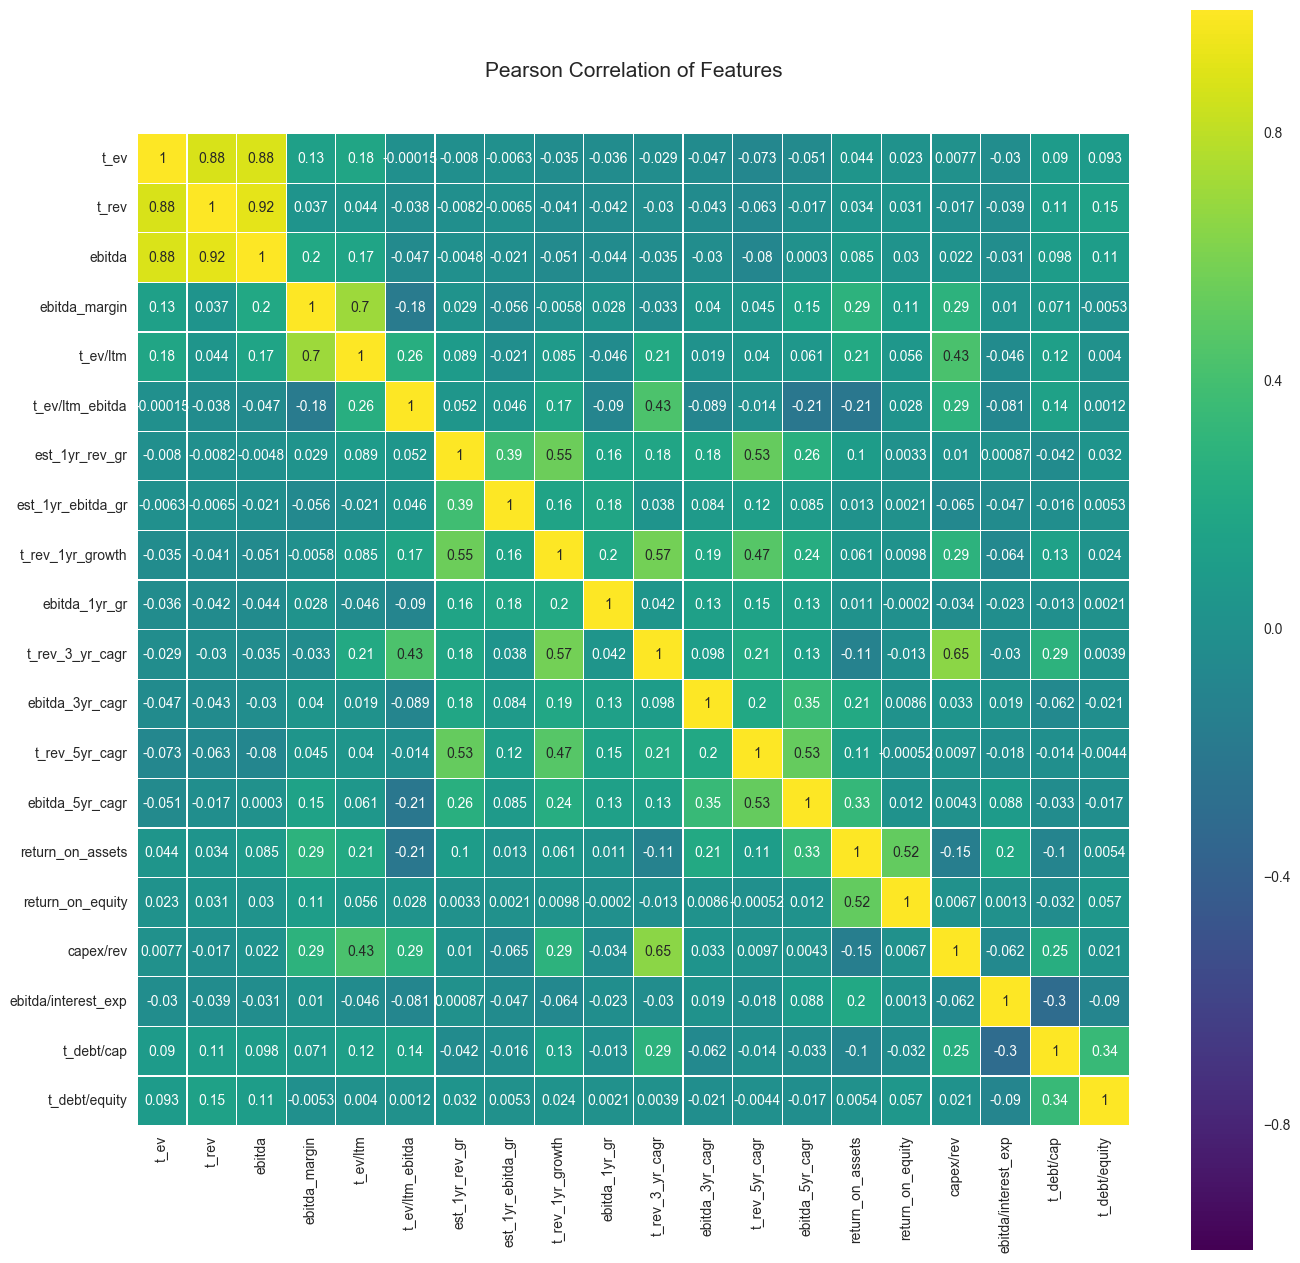

In [8]:
# Plot Feature Correlation Matrix
colormap = plt.cm.viridis
plt.figure( figsize=(16,16) )
plt.title( 'Pearson Correlation of Features', y=1.05, size=15 )
sns.heatmap( industrials.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True )

# Plot Feature Distributions

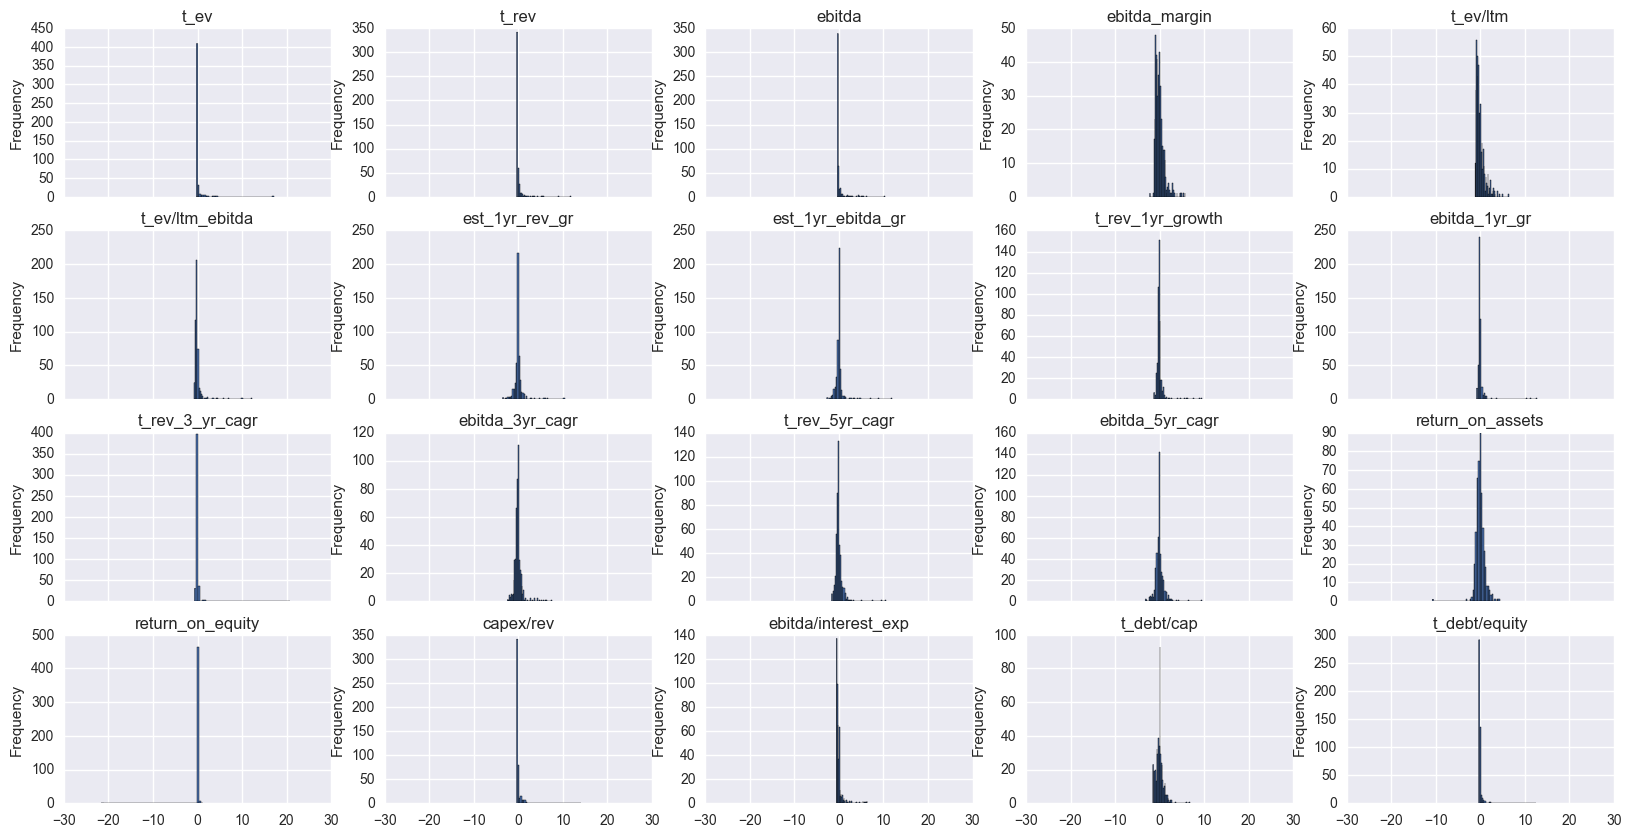

In [13]:
# Plot Feature Distributions
fig, ax = plt.subplots( 4, 5, sharex=True, figsize=(20, 10) )
a = ax.flatten()
for i, col in enumerate( industrials.columns ):
    industrials[col].plot( 'hist', bins=50, ax=a[i] )
    a[i].set_title( col )

# Separate Data into Training, Validation, and Test Sets

In [45]:
# Data Split Ratios
K                = 5
TRAIN_RATIO      = (K - 2) / K;
VALIDATION_RATIO = 1 / K;

# Randomly Shuffle Data Rows
np.random.seed( 12434 )
industrials_permutation = np.random.permutation( industrials.shape[0] )

# Separate Data Set
train_indices      = permutation[ : int(len(permutation) * TRAIN_RATIO) ]
validation_indices = permutation[ int(len(permutation) * TRAIN_RATIO) : int(len(permutation) * (TRAIN_RATIO + VALIDATION_RATIO)) ]
test_indices       = permutation[ int(len(permutation) * (TRAIN_RATIO + VALIDATION_RATIO)) : ]
print("Number of Industrials Data Points:      ", industrials.shape[0])
print("Number of Industrials Split Data Points:", len(train_indices), '+', len(validation_indices), '+', len(test_indices), "=", len(train_indices)+len(validation_indices)+len(test_indices))
train_data      = industrials.ix[train_indices, :]
validation_data = industrials.ix[validation_indices, :]
test_data       = industrials.ix[test_indices, :]

# Separate X and Y Data
train_x      = np.array( train_data.iloc[ :, 1: ] )
train_y      = np.array( train_data.iloc[ :, 0 ] )
validation_x = np.array( validation_data.iloc[ :, 1: ] )
validation_y = np.array( validation_data.iloc[ :, 0 ] )
test_x       = np.array( test_data.iloc[ :, 1: ] )
test_y       = np.array( test_data.iloc[ :, 0 ] )

Number of Industrials Data Points:       473
Number of Industrials Split Data Points: 283 + 95 + 95 = 473


# Linear Models

In [48]:
# Import Linear Models
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
from sklearn import metrics

<b>Ordinary Least Squares (OLS) Regression</b>

In [65]:
# Train an OLS Linear Model
ols_model = LinearRegression()
ols_model.fit( train_x, train_y )

# Test OLS Linear Model on Test Data
ols_predictions = ols_model.predict( test_x )
ols_mse         = metrics.mean_squared_error( ols_predictions, test_y )
print('OLS Mean Squared Error:', ols_mse)
pd.DataFrame(list(zip(feature_cols, ols_model.coef_)), columns=['Features', 'Coeffs'])

OLS Mean Squared Error: 0.0556223238587


,Features,Coeffs
0,t_rev,0.484108
1,ebitda,0.453712
2,ebitda_margin,-0.149573
3,t_ev/ltm,0.251984
4,t_ev/ltm_ebitda,-0.039754
5,est_1yr_rev_gr,-0.048209
6,est_1yr_ebitda_gr,0.013128
7,t_rev_1yr_growth,0.028747
8,ebitda_1yr_gr,0.047930
9,t_rev_3_yr_cagr,-0.030595
